In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# Load Datasets

In [2]:
nyc_df = pd.read_csv('NYC/cleaned_data/standardized.csv')
nyc_df['city'] = 'NYC'
nyc_df.head()

,neighborhood_id,neighborhood,AdultCareFacilities,Clinics,CommunityHealthCenters,DiagnosticTreatmentCenters,Hospitals,NursingHomes,SchoolBasedHealthFacilities,Daycares,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,city
0,1,Allerton,0.108378,-0.020591,-0.03306,0.015491,-0.037909,0.240096,-0.042261,0.014036,...,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206,NYC
1,2,Arden Heights,-0.041109,-0.046798,-0.03306,-0.056201,-0.037909,-0.049319,-0.042261,-0.056636,...,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206,NYC
2,3,Astoria,-0.041109,0.031823,-0.03306,0.015491,0.064153,-0.007974,-0.005963,0.006725,...,-0.001628,-0.002887,-0.015453,0.035060,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206,NYC
3,4,Bath Beach,-0.041109,-0.020591,-0.03306,-0.038278,-0.037909,-0.007974,-0.042261,-0.044451,...,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206,NYC
4,5,Financial District,-0.041109,-0.046798,-0.03306,-0.020355,0.064153,-0.049319,-0.042261,-0.031454,...,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,0.056651,-0.020077,-0.008735,-0.006206,NYC


In [3]:
chicago_df = pd.read_csv('Chicago/cleaned_data/standardized.csv')
chicago_df['city'] = 'Chicago'
chicago_df.head()

,neighborhood_id,shape_area,shape_len,2000_POP,2010_POP,TOT_POP,UND19,A20_34,A35_49,A50_64,...,Warehouse,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,city
0,DOUGLAS,0.052503,-0.031302,-0.028348,-0.046070,-0.039466,-0.038967,0.063531,-0.024270,-0.015235,...,-0.002191,-0.005948,-0.001554,-0.002142,-0.004614,-0.00391,0.075224,-0.002811,-0.012566,Chicago
1,OAKLAND,0.019303,-0.058135,-0.080177,-0.079915,-0.077765,0.082057,-0.062933,0.037124,-0.025500,...,-0.002191,-0.005948,-0.001554,-0.002142,-0.004614,-0.00391,0.012749,-0.002811,-0.012566,Chicago
2,FULLER PARK,0.022730,-0.044618,-0.087025,-0.088272,-0.089161,-0.090144,-0.053760,-0.048314,0.060925,...,-0.002191,-0.005948,-0.001554,-0.002142,-0.004614,-0.00391,0.065625,-0.002811,-0.012566,Chicago
3,GRAND BOULEVARD,0.055342,-0.037928,-0.024438,-0.035930,-0.035315,0.013547,-0.054031,0.020223,0.003538,...,-0.002191,-0.005948,-0.001554,-0.002142,-0.004614,-0.00391,0.011640,-0.002811,-0.012566,Chicago
4,KENWOOD,0.033178,-0.049333,-0.048986,-0.047160,-0.049198,-0.066856,0.028534,-0.011850,0.002377,...,-0.002191,-0.005948,0.056570,-0.002142,-0.004614,-0.00391,-0.048336,-0.002811,0.103682,Chicago


In [4]:
nyc = gpd.read_file('NYC/cleaned_data/nyc.geojson')
nyc = nyc[['Unique Identifier','geometry']]
nyc.columns=['neighborhood_id','geometry']

In [5]:
chicago = gpd.read_file('Chicago/cleaned_data/chicago.geojson')
chicago = chicago[['community','geometry']]
chicago.columns=['neighborhood_id','geometry']

# Generate Dataset of Common Items

In [6]:
cols = nyc_df.columns.intersection(chicago_df.columns)
cols

Index(['neighborhood_id', 'shape_area', 'accessible', 'airport', 'amazing',
       'american', 'architecture', 'art', 'artists', 'authentic',
       ...
       'Volleyball Court', 'Warehouse Store', 'Waterfront', 'Whisky Bar',
       'Wine Bar', 'Wine Shop', 'Wings Joint', 'Women's Store', 'Yoga Studio',
       'city'],
      dtype='object', length=432)

In [7]:
df = nyc_df[cols].append(chicago_df[cols])
df.head()

,neighborhood_id,shape_area,accessible,airport,amazing,american,architecture,art,artists,authentic,...,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,city
0,1,-0.004671,0.015268,-0.032981,-0.022373,-0.021746,-0.007477,-0.031978,-0.010914,-0.017921,...,-0.00041,-0.010462,-0.001304,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,NYC
1,2,-0.000063,-0.020446,-0.050839,-0.040230,-0.021746,-0.007477,-0.031978,-0.010914,-0.017921,...,-0.00041,0.045615,-0.001304,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,NYC
2,3,0.005865,-0.011972,-0.008466,0.069940,0.015542,-0.004088,-0.011639,0.000950,0.014282,...,-0.00041,-0.010462,-0.001304,-0.002887,-0.015453,0.035060,-0.011688,-0.006095,-0.020077,NYC
3,4,-0.039038,0.032185,0.001793,0.012402,-0.021746,-0.007477,-0.031978,-0.010914,-0.017921,...,-0.00041,0.045440,-0.001304,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,NYC
4,5,-0.041022,-0.017135,-0.021037,-0.015395,0.026267,0.012390,-0.030322,-0.010914,0.008569,...,-0.00041,-0.010462,-0.001304,-0.002887,-0.015453,-0.021195,-0.011688,0.056651,-0.020077,NYC


In [8]:
chicago_df.rename(columns={"TOT_POP": "TotalPop", 
                        "HISP": "HispanicPopPercent",
                        "WHITE": "WhiteNonHispPopPercent",
                        "BLACK": "BlackNonHispPopPercent",
                        "ASIAN": "AsianPIPopPercent",
                        "OTHER": "OtherRacePopPercent",
                        "FOR_BORN": "ForeignBornPopPercent",
                        "UND19": "PopU18PopPercent",
                        "A65_74": "Pop65plPopPercent",
                        "A75_84": "Pop65plPopPercent",
                        "OV85": "Pop65plPopPercent",
                        "UNEMP": "UnemploymentPopPercent"},
                 inplace=True)
chicago_df = chicago_df.groupby(chicago_df.columns, axis=1).sum()
chicago_df.head()

,2000_POP,2010_POP,A20_34,A35_49,A50_64,ARABIC,ASSOC,ATM,AVG_VMT,Accessories Store,...,white,wicker,wine,winning,wonderful,work,working,world,young,zoo
0,-0.028348,-0.046070,0.063531,-0.024270,-0.015235,0.001353,0.002924,-0.0016,-0.042094,-0.002574,...,0.237323,-0.022712,-0.007504,-0.005066,-0.023439,-0.012907,-0.032829,-0.023055,-0.014656,-0.017256
1,-0.080177,-0.079915,-0.062933,0.037124,-0.025500,-0.005817,0.005010,-0.0016,-0.033638,-0.002574,...,0.017720,-0.022712,0.069419,-0.005066,0.053484,-0.012907,-0.032829,0.015407,-0.014656,-0.017256
2,-0.087025,-0.088272,-0.053760,-0.048314,0.060925,-0.005407,0.011983,-0.0016,-0.035182,-0.002574,...,-0.020741,-0.022712,-0.007504,-0.005066,-0.023439,-0.012907,-0.032829,-0.023055,-0.014656,-0.017256
3,-0.024438,-0.035930,-0.054031,0.020223,0.003538,-0.005817,0.013127,-0.0016,-0.024111,-0.002574,...,0.133105,-0.022712,0.014474,-0.005066,-0.001461,-0.001918,-0.032829,-0.001077,0.007322,-0.017256
4,-0.048986,-0.047160,0.028534,-0.011850,0.002377,-0.003490,0.005378,-0.0016,-0.030878,-0.002574,...,0.045925,-0.022712,-0.007504,-0.005066,-0.023439,-0.012907,-0.032829,-0.023055,0.029788,-0.017256


In [9]:
cols_with_quant = nyc_df.columns.intersection(chicago_df.columns)
cols_with_quant

Index(['neighborhood_id', 'TotalPop', 'shape_area', 'PopU18PopPercent',
       'Pop65plPopPercent', 'HispanicPopPercent', 'WhiteNonHispPopPercent',
       'BlackNonHispPopPercent', 'AsianPIPopPercent', 'OtherRacePopPercent',
       ...
       'Volleyball Court', 'Warehouse Store', 'Waterfront', 'Whisky Bar',
       'Wine Bar', 'Wine Shop', 'Wings Joint', 'Women's Store', 'Yoga Studio',
       'city'],
      dtype='object', length=442)

In [10]:
df_with_quant = nyc_df[cols_with_quant].append(chicago_df[cols_with_quant])
df_with_quant.tail()

,neighborhood_id,TotalPop,shape_area,PopU18PopPercent,Pop65plPopPercent,HispanicPopPercent,WhiteNonHispPopPercent,BlackNonHispPopPercent,AsianPIPopPercent,OtherRacePopPercent,...,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,city
72,MOUNT GREENWOOD,-0.043540,0.086260,0.026101,-0.010466,-0.175795,0.566986,-0.347041,-0.037888,-0.006258,...,-0.000735,0.047505,-0.001554,-0.002142,-0.004614,-0.003910,-0.048336,-0.002811,-0.012566,Chicago
73,MORGAN PARK,-0.035095,0.104855,0.011741,0.051116,-0.223849,-0.002875,0.277291,-0.059011,0.008403,...,-0.000735,-0.005948,-0.001554,-0.002142,-0.004614,-0.003910,-0.048336,-0.002811,-0.012566,Chicago
74,OHARE,-0.062235,0.424356,-0.082818,0.021780,-0.196857,0.518602,-0.367471,0.018910,0.026819,...,-0.000735,-0.005948,-0.001554,-0.002142,0.065920,-0.003910,-0.048336,-0.002811,0.057969,Chicago
75,EDGEWATER,0.055861,0.055293,-0.109134,0.016677,-0.094853,0.269939,-0.246623,0.057205,0.014336,...,-0.000735,-0.005948,-0.001554,0.061616,0.059143,0.123605,-0.048336,-0.002811,-0.012566,Chicago
76,EDISON PARK,-0.064327,0.036105,-0.019566,0.025465,-0.158003,0.547006,-0.362954,-0.033724,0.007592,...,-0.000735,0.056798,-0.001554,-0.002142,-0.004614,-0.003910,-0.048336,-0.002811,0.050180,Chicago


# K-Means # of Clusters 

In [11]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,2:-1].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 305.700128525187
2 280.9802819773156
3 265.89094308496743
4 263.19857941592664
5 250.5993871742814
6 244.95311207318227
7 238.61203015962212
8 232.8652300824941
9 231.17989095146714
10 220.70216240456512
11 216.5906477333847
12 213.9140093786103
13 214.23120948884684
14 209.8656875351367
15 204.17314412139234
16 201.024007008967
17 202.0630351393151
18 195.2907781949878
19 193.59691014967385
20 191.65421992814004
21 186.96319816330873
22 184.83870407000109
23 185.0094102278205
24 179.68205634738527
25 178.05986489346918
26 172.1984318220688
27 172.5302723720589
28 171.02995971351177
29 168.2499615990162
30 165.59490018686506
31 164.7660923218292
32 164.13796127419167
33 160.34781945164917
34 158.63590455724028
35 157.52582243820717
36 153.7255705464658
37 153.74944178569484
38 151.7495234338973
39 150.2356895967497
40 145.3440112849972
41 145.18452076580598
42 144.44312118047782
43 140.47075617296687
44 139.2071724390793
45 138.72216624652506
46 136.1778237243308
47 134.9004936085433

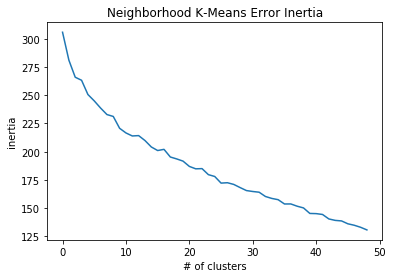

In [12]:
error_df['inertia'].plot()
plt.title('Neighborhood K-Means Error Inertia')
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.savefig('images/kmean_error.png')

In [13]:
n_clusters = 8

# PCA

In [14]:
pc_cols = ['pc1','pc2','pc3'] # get top 3 principal components

## Qualitative Features Only

In [15]:
pca = PCA(n_components=3)
features = df.iloc[:,2:-1].values
principalComponents = pca.fit_transform(features)
pca_by_neighborhood = pd.DataFrame(data = principalComponents, columns = pc_cols)
pca.explained_variance_ratio_

array([0.10926307, 0.06820459, 0.04732607])

In [16]:
pcaFeaturesDf = pd.DataFrame(data = pca.components_.T, columns = pc_cols)
pcaFeaturesDf = pd.concat([pcaFeaturesDf,pd.Series(df.columns[2:])],axis=1)

In [17]:
pcaFeaturesDf.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
104,0.433938,restaurants
10,0.339688,bars
168,0.252243,Bar
203,0.247219,Coffee Shop
110,0.180706,shops


In [18]:
pcaFeaturesDf.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
221,-0.222120,Donut Shop
343,-0.215195,Pharmacy
230,-0.213066,Fast Food Restaurant
217,-0.198872,Discount Store
100,-0.166503,quiet


In [19]:
pcaFeaturesDf.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
135,0.322657,walking
41,0.304842,eat
95,0.268998,pizza
75,0.264730,local
103,0.260174,restaurant


In [20]:
pcaFeaturesDf.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
81,-0.079157,museum
217,-0.040044,Discount Store
335,-0.039520,Park
109,-0.036091,shopping
10,-0.035126,bars


## Combined Data

In [21]:
pca2 = PCA(n_components=3)
features2 = df_with_quant.iloc[:,2:-1].values
principalComponents2 = pca2.fit_transform(features2)
pca_by_neighborhood_quant = pd.DataFrame(data = principalComponents2, columns = pc_cols)
pca2.explained_variance_ratio_

array([0.13802874, 0.07509877, 0.06222377])

In [22]:
pcaFeaturesDf2 = pd.DataFrame(data = pca2.components_.T, columns = pc_cols)
pcaFeaturesDf2 = pd.concat([pcaFeaturesDf2,pd.Series(df_with_quant.columns[2:])],axis=1)

In [23]:
pcaFeaturesDf2.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
5,0.516436,BlackNonHispPopPercent
227,0.188956,Discount Store
240,0.174798,Fast Food Restaurant
231,0.144161,Donut Shop
206,0.140489,Caribbean Restaurant


In [24]:
pcaFeaturesDf2.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
4,-0.469402,WhiteNonHispPopPercent
114,-0.298873,restaurants
20,-0.206756,bars
213,-0.176780,Coffee Shop
178,-0.155890,Bar


In [25]:
pcaFeaturesDf2.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
3,0.584479,HispanicPopPercent
319,0.243977,Mexican Restaurant
8,0.212301,ForeignBornPopPercent
88,0.177277,mexican
145,0.135774,walking


In [26]:
pcaFeaturesDf2.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
5,-0.354153,BlackNonHispPopPercent
4,-0.226072,WhiteNonHispPopPercent
91,-0.120516,museum
213,-0.116121,Coffee Shop
296,-0.087682,Italian Restaurant


# K-Means

## Qualitative

In [27]:
Kmean = KMeans(n_clusters=n_clusters)
Kmean.fit(features)
df['kmean'] = Kmean.labels_

In [28]:
df.reset_index(inplace=True)
pca_by_neighborhood = pd.concat([pca_by_neighborhood, df[['kmean','neighborhood_id','city']]], axis = 1)
pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,city
0,-0.486947,0.052932,-0.165216,7,1,NYC
1,-0.323044,-0.206325,-0.121051,7,2,NYC
2,0.593970,-0.036148,-0.117357,1,3,NYC
3,-0.018658,-0.142908,0.286882,3,4,NYC
4,0.308898,-0.285328,0.414477,1,5,NYC


## Quantitative

In [29]:
Kmean2 = KMeans(n_clusters=n_clusters)
Kmean2.fit(features2)
df_with_quant['kmean'] = Kmean2.labels_

In [30]:
df_with_quant.reset_index(inplace=True)
pca_by_neighborhood_quant = pd.concat([pca_by_neighborhood_quant, df_with_quant[['kmean','neighborhood_id','city']]], axis = 1)
pca_by_neighborhood_quant.head()

,pc1,pc2,pc3,kmean,neighborhood_id,city
0,0.464426,0.207480,0.189515,1,1,NYC
1,-0.131390,-0.247602,0.494878,3,2,NYC
2,-0.516747,-0.013535,-0.362220,6,3,NYC
3,-0.231681,-0.153490,0.271601,3,4,NYC
4,-0.428828,-0.367556,-0.083751,6,5,NYC


# PCA Plots

In [31]:
#get color map 
cmap = ListedColormap(sns.color_palette("Paired",n_clusters))

## Qualitative Data

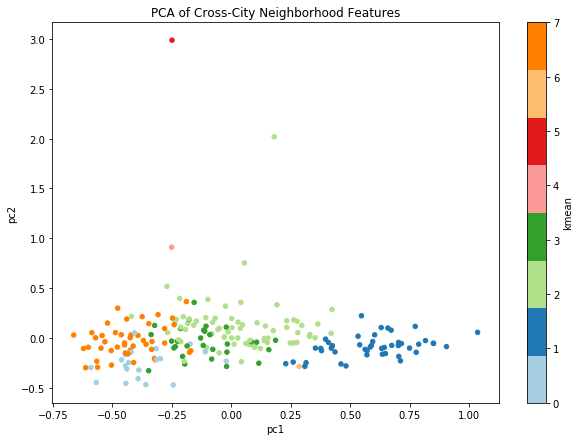

In [44]:
pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',
                                 colormap = cmap, figsize=(10,7),sharex=False)
plt.title('PCA of Cross-City Neighborhood Features')
plt.savefig('images/pca_all.png')

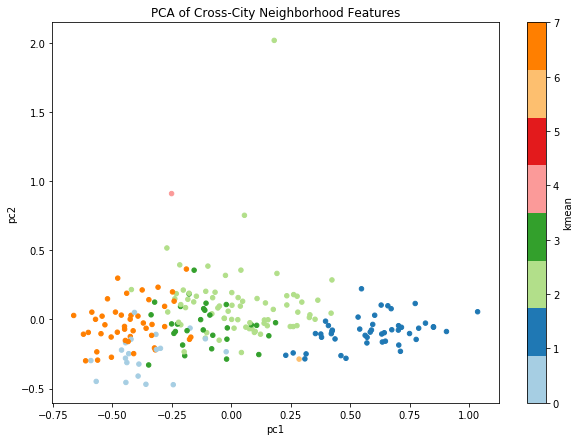

In [43]:
pca_by_neighborhood[pca_by_neighborhood.kmean != 5].plot.scatter(x='pc1',y='pc2',c='kmean',
                                 colormap = cmap, figsize=(10,7),sharex=False)
plt.title('PCA of Cross-City Neighborhood Features')
plt.savefig('images/pca_all_no_outlier.png')

## Combined Dataset

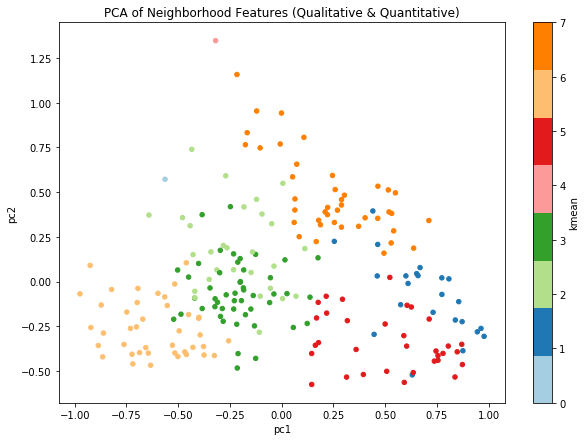

In [33]:
pca_by_neighborhood_quant.plot.scatter(x='pc1',y='pc2',c='kmean',
                                 colormap = cmap, figsize=(10,7),sharex=False)
plt.title('PCA of Neighborhood Features (Qualitative & Quantitative)')
plt.savefig('images/pca_all_quant.png')

# Maps

## Qualitative

In [34]:
nyc.neighborhood_id = nyc.neighborhood_id.astype(object)
nyc_all = nyc.merge(pca_by_neighborhood[pca_by_neighborhood.city == 'NYC'],on='neighborhood_id')
nyc_all.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,city
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,-0.486947,0.052932,-0.165216,7,NYC
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,-0.323044,-0.206325,-0.121051,7,NYC
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,0.593970,-0.036148,-0.117357,1,NYC
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,-0.018658,-0.142908,0.286882,3,NYC
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,0.308898,-0.285328,0.414477,1,NYC


In [35]:
chicago_all = chicago.merge(pca_by_neighborhood[pca_by_neighborhood.city == 'Chicago'],on='neighborhood_id')
chicago_all.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,city
0,DOUGLAS,(POLYGON ((-87.60914087617894 41.8446925026539...,0.157471,-0.118474,0.242456,3,Chicago
1,OAKLAND,(POLYGON ((-87.59215283879394 41.8169293462668...,0.185747,-0.023805,0.349135,3,Chicago
2,FULLER PARK,(POLYGON ((-87.62879823733725 41.8018930336891...,-0.297826,-0.209014,0.184885,0,Chicago
3,GRAND BOULEVARD,(POLYGON ((-87.6067081256125 41.81681377057218...,-0.077953,-0.114499,0.136080,3,Chicago
4,KENWOOD,(POLYGON ((-87.59215283879394 41.8169293462668...,0.115383,-0.254096,0.363394,3,Chicago


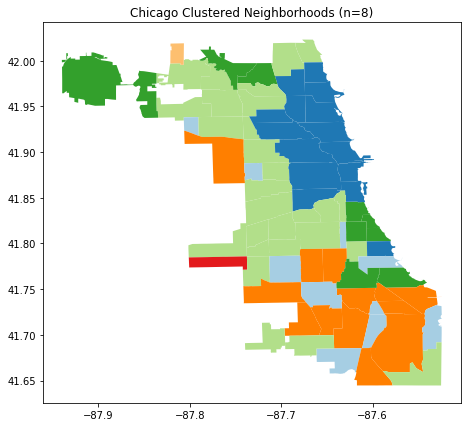

In [36]:
chicago_all.plot(column='kmean',cmap=cmap,figsize=(20,7))
plt.title('Chicago Clustered Neighborhoods (n=8)')
plt.savefig('images/chicago.png')

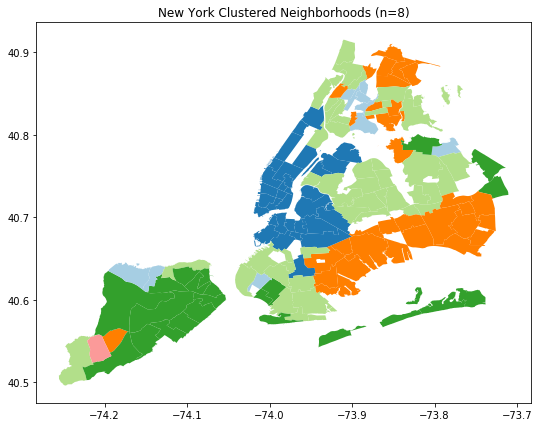

In [37]:
nyc_all.plot(column='kmean',cmap=cmap,figsize=(20,7))
plt.title('New York Clustered Neighborhoods (n=8)')
plt.savefig('images/nyc.png')

## Combined Data

In [38]:
nyc.neighborhood_id = nyc.neighborhood_id.astype(object)
nyc_all_quant = nyc.merge(pca_by_neighborhood_quant[pca_by_neighborhood_quant.city == 'NYC'],on='neighborhood_id')
nyc_all_quant.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,city
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,0.464426,0.207480,0.189515,1,NYC
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,-0.131390,-0.247602,0.494878,3,NYC
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,-0.516747,-0.013535,-0.362220,6,NYC
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,-0.231681,-0.153490,0.271601,3,NYC
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,-0.428828,-0.367556,-0.083751,6,NYC


In [39]:
chicago_all_quant = chicago.merge(pca_by_neighborhood_quant[pca_by_neighborhood_quant.city == 'Chicago'],on='neighborhood_id')
chicago_all_quant.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,city
0,DOUGLAS,(POLYGON ((-87.60914087617894 41.8446925026539...,0.145189,-0.401757,-0.171976,5,Chicago
1,OAKLAND,(POLYGON ((-87.59215283879394 41.8169293462668...,0.313794,-0.533705,-0.241528,5,Chicago
2,FULLER PARK,(POLYGON ((-87.62879823733725 41.8018930336891...,0.590412,-0.302240,-0.036830,5,Chicago
3,GRAND BOULEVARD,(POLYGON ((-87.6067081256125 41.81681377057218...,0.507819,-0.501374,-0.166065,5,Chicago
4,KENWOOD,(POLYGON ((-87.59215283879394 41.8169293462668...,0.145316,-0.574869,-0.122403,5,Chicago


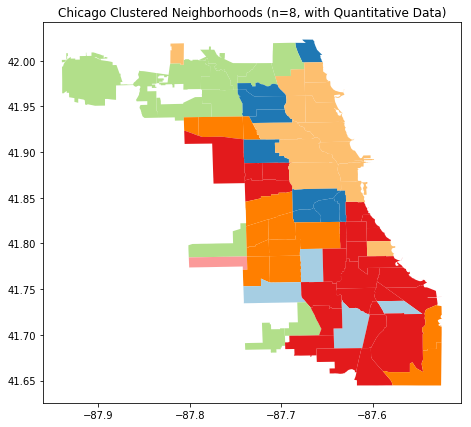

In [40]:
chicago_all_quant.plot(column='kmean',cmap=cmap,figsize=(20,7))
plt.title('Chicago Clustered Neighborhoods (n=8, with Quantitative Data)')
plt.savefig('images/chicago_with_quant.png')

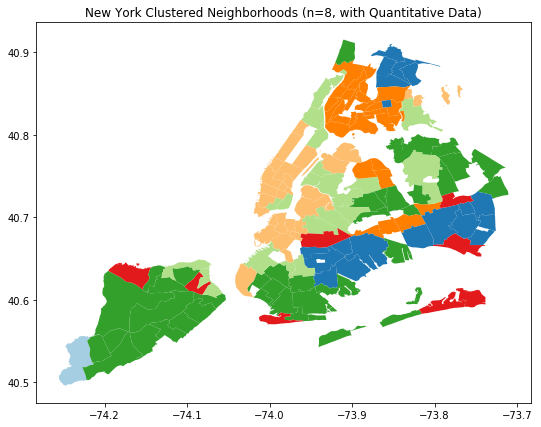

In [41]:
nyc_all_quant.plot(column='kmean',cmap=cmap,figsize=(20,7))
plt.title('New York Clustered Neighborhoods (n=8, with Quantitative Data)')
plt.savefig('images/nyc_with_quant.png')

# Save Dataset